# Color Spaces

In this kernel we're gonna cover:
1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [1]:
# Import libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Write our imshow function again 
def imshow(image, title = 'image', size = 10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

> 🔑**Note:** In case of we don't want to rewrite our imshow function, we could create a script and upload it to github and then use the function by downloading it.

In [3]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-13 15:15:45--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.62
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.3MB/s    in 1.6s    

2022-08-13 15:15:47 (17.3 MB/s) - ‘images.zip’ saved [29586716/29586716]



## View the individual channels of an RGB image

We could split an image to get each color space seperately. 

To do so, we need to use `cv2.split()` function.

In [4]:
# Load our image
image = cv2.imread('./images/castara.jpeg')

# Split our RGB image 
B, G, R = cv2.split(image)

# Check the shapes of each color space
print(f'Shape of B: {B.shape}\nShape of G: {G.shape}\nShape of R: {R.shape}')

Shape of B: (1280, 960)
Shape of G: (1280, 960)
Shape of R: (1280, 960)


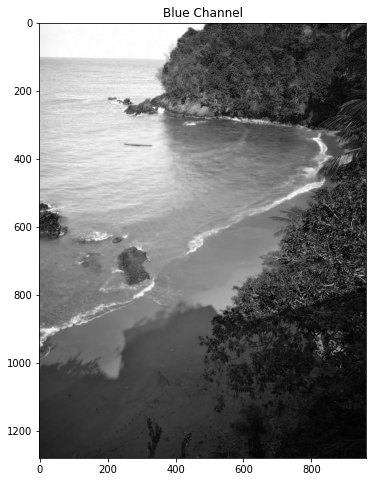

In [5]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow(B, 'Blue Channel', 8)

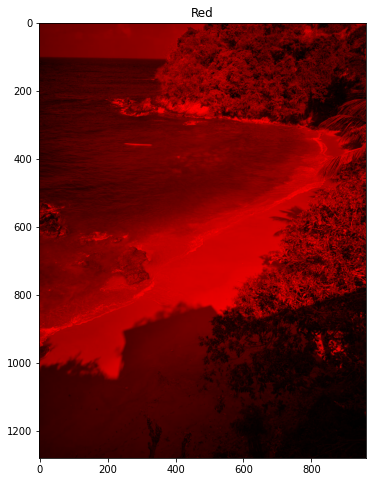

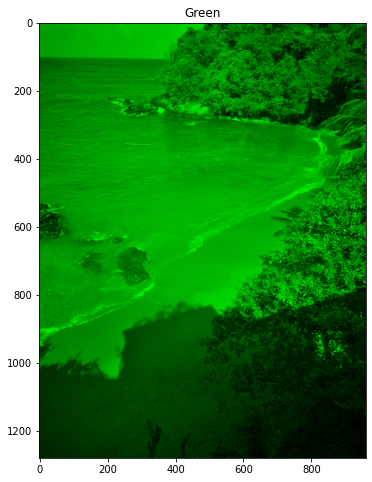

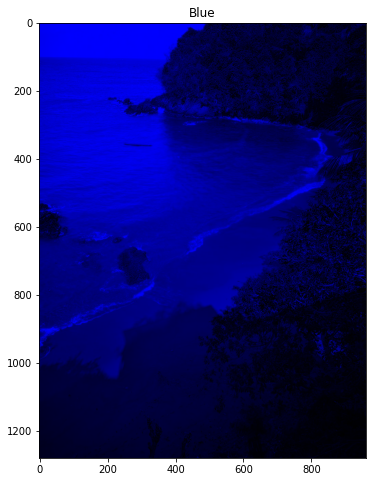

In [6]:
# Create a matrix of zeros
zeros = np.zeros(image.shape[:2], dtype = 'uint8')

# How each color component looks like?
imshow(cv2.merge([zeros, zeros, R]), 'Red', 8)
imshow(cv2.merge([zeros, G, zeros]), 'Green', 8)
imshow(cv2.merge([B, zeros, zeros]), 'Blue', 8)

> 🔑**Note:** After we split our image, we can re-make the original image by using `cv2.merge` function.

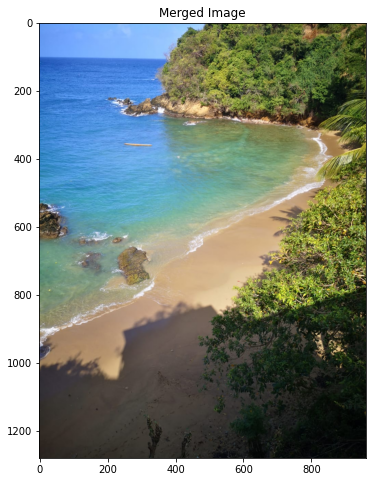

In [7]:
# Let's remake the original image
merged_image = cv2.merge([B, G, R])
imshow(merged_image, 'Merged Image', size = 8)

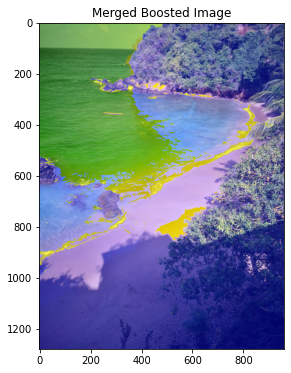

In [8]:
# We can amplify the colors
merged_boosted_image = cv2.merge([B + 100, G, R])
imshow(merged_boosted_image, title = 'Merged Boosted Image', size = 6)

## The HSV Color Space

* Hue: 0-170
* Saturation: 0-255
* Value (Intensity): 0-255

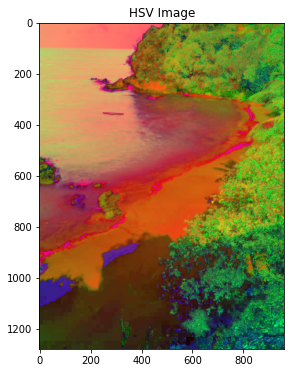

In [9]:
# Reload our image
image = cv2.imread('./images/castara.jpeg')

# Convert our image into HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow(hsv_image, title = 'HSV Image', size = 6)

> 🔑**Note:** This looks odd... The reason why it looks odd is our plotting function was designed only for RGB images, not for HSV images.

## View Each channel type in the HSV Color Space Representation

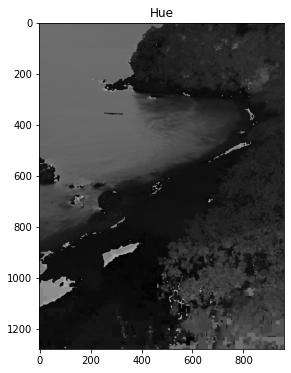

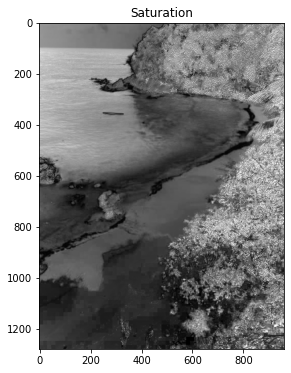

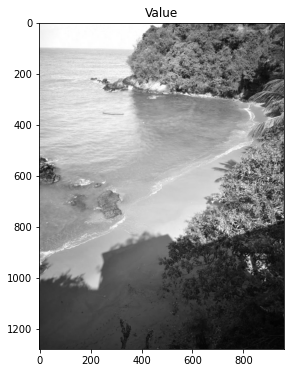

In [10]:
# Let's look at the individual components of an HSV Image
imshow(hsv_image[:, :, 0], 'Hue', size = 6)
imshow(hsv_image[:, :, 1], 'Saturation', size = 6)
imshow(hsv_image[:, :, 2], 'Value', size = 6)